In [1]:
import pandas as pd 
import numpy as np 
import glob as glob 
import os
import cv2
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
bed = glob.glob('data/Bed/*.jpg')
chair = glob.glob('data/Chair/*.jpg')
sofa = glob.glob('data/Sofa/*.jpg')


In [31]:
print(bed[0:5])
print(chair[0:5])
print(sofa[0:5])

[]
[]
[]


In [18]:
for image in chair[0:5]:
    img = cv2.imread(image)
    print(f"The size of {image} is {img.shape[1]}x{img.shape[0]} pixels")

The size of data/Chair/Ardor Office Chair in Black .jpg is 1230x1486 pixels
The size of data/Chair/Armen Living Geneva Mid-Century Office Chair in Chrome finish with Black Faux Leather and Walnut Veneer Arms.jpg is 2000x2000 pixels
The size of data/Chair/Alpha Office Chair.jpg is 2700x2700 pixels
The size of data/Chair/Adara Desk Chair-Knoll Natural.jpg is 2701x2701 pixels
The size of data/Chair/Augustine Swivel Chair-Deacon Wolf.jpg is 3359x3359 pixels


In [17]:
len(bed),len(chair),len(sofa)

(100, 100, 100)

In [21]:
new_size = (224, 224)

input_dir = 'data/Bed'
output_dir = 'resize_bed'

for file_name in os.listdir(input_dir):
    image = cv2.imread(os.path.join(input_dir, file_name))
    resized_image = cv2.resize(image, new_size)
    cv2.imwrite(os.path.join(output_dir, file_name), resized_image)

In [23]:

new_size = (224, 224)

input_dir = 'data/Sofa'
output_dir = 'resize_sofa'

for file_name in os.listdir(input_dir):
    image = cv2.imread(os.path.join(input_dir, file_name))
    resized_image = cv2.resize(image, new_size)
    cv2.imwrite(os.path.join(output_dir, file_name), resized_image)

In [24]:
new_size = (224, 224)

input_dir = 'data/Chair'
output_dir = 'resize_chair'

for file_name in os.listdir(input_dir):
    image = cv2.imread(os.path.join(input_dir, file_name))
    resized_image = cv2.resize(image, new_size)
    cv2.imwrite(os.path.join(output_dir, file_name), resized_image)

In [35]:
bed = glob.glob('data/resize_bed/*.jpg')
chair = glob.glob('data/resize_chair/*.jpg')
sofa = glob.glob('data/resize_sofa/*.jpg')

In [36]:
for image in bed[0:5]:
    img = cv2.imread(image)
    print(f"The size of {image} is {img.shape[1]}x{img.shape[0]} pixels")

The size of data/resize_bed/Amelie Bed Queen White.jpg is 224x224 pixels
The size of data/resize_bed/Aubree Grey Queen Bed.jpg is 224x224 pixels
The size of data/resize_bed/Annika Queen Platform Bed in Brown.jpg is 224x224 pixels
The size of data/resize_bed/Alina Full Platform Bed Frame.jpg is 224x224 pixels
The size of data/resize_bed/90cm Bed with underbed drawer.jpg is 224x224 pixels


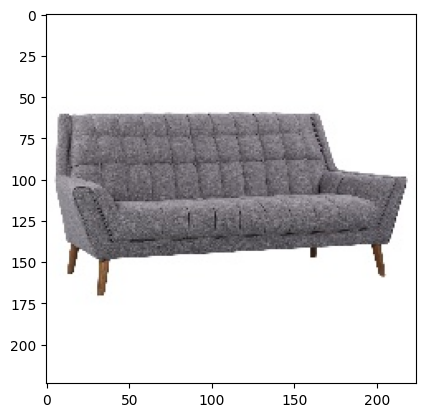

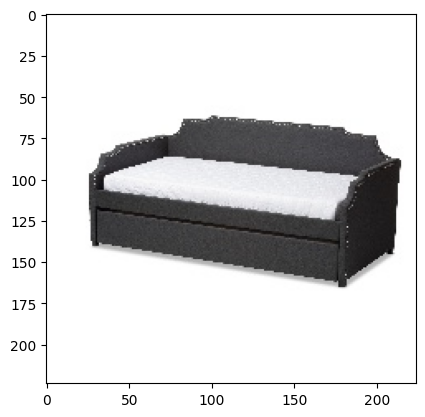

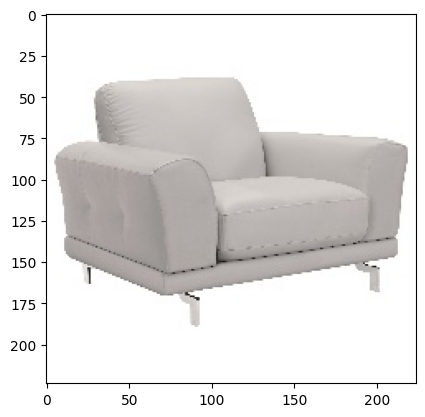

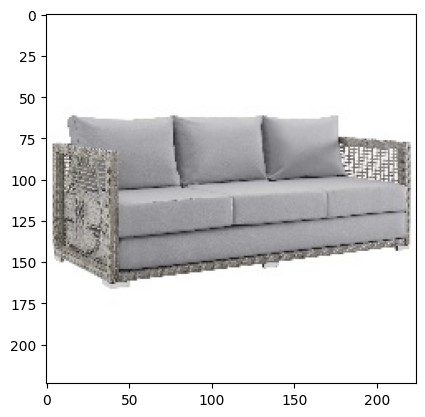

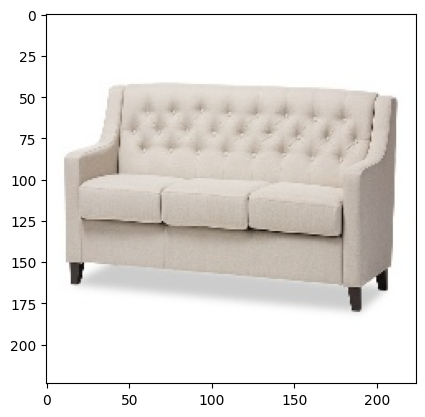

In [40]:
input_dir='data/resize_sofa'
for dirpath, dirnames, filenames in os.walk(input_dir):
    for filename in filenames[0:5]:
        image_path = os.path.join(dirpath, filename)
        image = mpimg.imread(image_path)
        plt.imshow(image)
        plt.show()

2023-02-22 20:29:01.554952: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-02-22 20:31:19.523374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

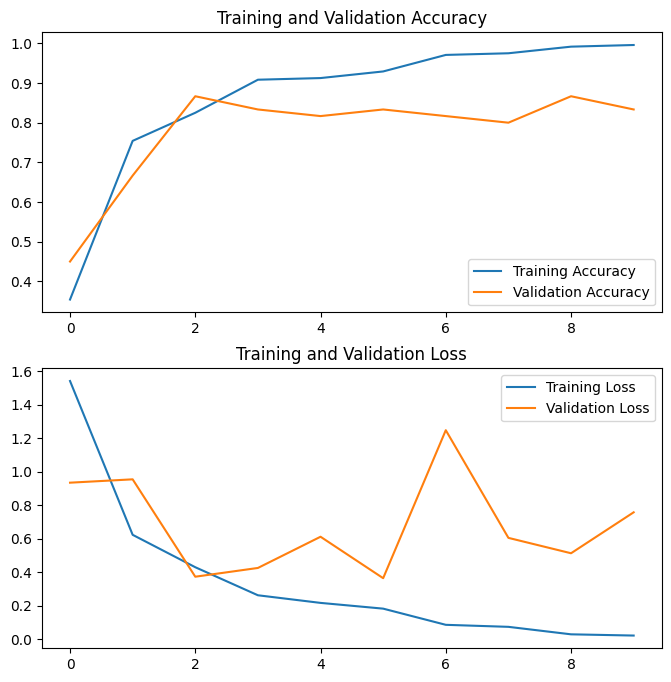

In [42]:
input_shape = (224, 224, 3)

# Define the number of classes
num_classes = 3

# Define the model
model = keras.Sequential(
    [
        layers.InputLayer(input_shape),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Set the batch size and number of epochs
batch_size = 32
epochs = 10

# Set the training and validation data generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'resize',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_generator = train_datagen.flow_from_directory(
    'resize',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
